<a href="https://colab.research.google.com/github/taylanoaydin/quantum/blob/main/The_Art_of_Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pylatexenc qiskit

     |████████████████████████████████| 162 kB 7.1 MB/s 
     |████████████████████████████████| 6.1 MB 19.1 MB/s 
     |████████████████████████████████| 17.9 MB 118 kB/s 
     |████████████████████████████████| 236 kB 70.5 MB/s 
     |████████████████████████████████| 207 kB 71.9 MB/s 
     |████████████████████████████████| 2.1 MB 28.4 MB/s 
     |████████████████████████████████| 1.4 MB 42.5 MB/s 
     |████████████████████████████████| 634 kB 66.0 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 38.2 MB 26 kB/s 
     |████████████████████████████████| 49 kB 7.9 MB/s 
     |████████████████████████████████| 943 kB 77.8 MB/s 
     |████████████████████████████████| 3.5 MB 27.8 MB/s 
     |████████████████████████████████| 6.3 MB 22.8 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=ef5d5e25bdf6df223679eb81328b95cbf827ed4dc4d8f2e30b8a2a0675f5c55c
  Stored in directory: /root/.cache/

In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

In [71]:
  qr = QuantumRegister(3, name="q")
  crz = ClassicalRegister(1, name="crz")
  crx = ClassicalRegister(1, name="crx")
  qc = QuantumCircuit(qr, crz, crx)

  psi = random_statevector(2)
  psi_dict = (psi.to_dict())

  init_gate = Initialize(psi)
  init_gate.label = "init"

  display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
  plot_bloch_multivector(psi)

  qc.append(init_gate, [0])
  qc.barrier()

<IPython.core.display.Latex object>

In [52]:
  def create_bell_pair(qc, a, b):
      qc.h(a) 
      qc.cx(a,b)
  def a_gates(qc, psi, a):
      qc.cx(psi, a)
      qc.h(psi)
  def measure_and_send(qc, a, b):
      qc.barrier()
      qc.measure(a,0)
      qc.measure(b,1)
  def b_gates(qc, qubit, crz, crx):
      qc.x(qubit).c_if(crx, 1)  
      qc.z(qubit).c_if(crz, 1)

In [53]:
  create_bell_pair(qc, 1, 2)
  qc.barrier()
  a_gates(qc, 0, 1)
  measure_and_send(qc, 0, 1)
  b_gates(qc, 2, crz, crx)
  qc.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.52356-0.6617j,-0.052048+0.53417j) ├─░────────────░───■──┤ H ├»
       └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                     ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ──────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                     ░      └───┘ ░           »
crz: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
crx: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐                 
«  q_0: ─░─┤M├─────────────────
«        ░ └╥┘┌─┐              
«  q_1: ─░──╫─┤M├──────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ 
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─
«        ░  ║  ║  └─╥─┘  └─╥─┘ 
«           ║  ║    ║   ┌──╨──┐
«crz: 1/════╩══╬════╬═══╡ = 1 ╞
«           0  ║ ┌──╨──┐└─────┘
«crx: 1/═══════╩═╡ = 1 ╞═══════
«              0 └─────┘

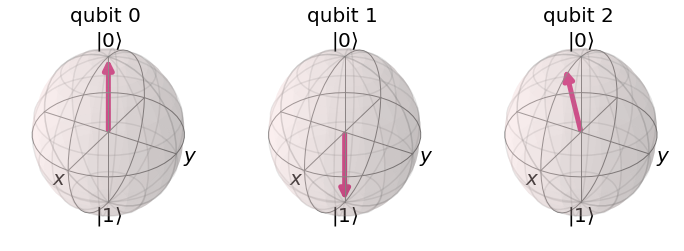

In [54]:
  sim = Aer.get_backend('aer_simulator')
  qc.save_statevector()
  out_vector = sim.run(qc).result().get_statevector()
  plot_bloch_multivector(out_vector)

In [17]:
!pip3 install ColabTurtle
from ColabTurtle.Turtle import *

  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7655 sha256=64e752d8500915c17352bf48c20790202d26531767ed038d99a5c793283238b1
  Stored in directory: /root/.cache/pip/wheels/0d/ab/65/cc4478508751448dfb4ecb20a6533082855c227dfce8c13902
Successfully built ColabTurtle


In [18]:
def draw_qubit(prob_0, color_1, color_2):
  length = 0
  for i in range(72):
    if (np.random.random_sample() < prob_0): pencolor(color_1)
    else: pencolor(color_2)
    forward(length)
    right(58)
    length = length + 1

  left(2)
  forward(12)

In [72]:
initializeTurtle()
# Canvas is 800 x 500

hideturtle()
pensize(3)
speed(13)

# Convert probability amplitutde to probability for quantum state want to transfer
X = psi_dict['0']
print(X)
Y = (X.real, X.imag)
print(Y)
prob_0 = X.real*X.real + X.imag*X.imag

print(prob_0)
penup()
goto(200, 150)
pendown()
draw_qubit(prob_0, 'orange', 'lightgreen')

penup()
goto(600, 150)
pendown()
draw_qubit(prob_0, 'orange', 'lightgreen')


(0.13257800263763805-0.7411827848642534j)
(0.13257800263763805, -0.7411827848642534)
0.5669288473625156


In [138]:
penup()
goto(400, 300)
pendown()
draw_qubit(0.5, 'lightblue', 'lightgray')

In [139]:
penup()
goto(400, 450)
write("Telemon", align="center", font=(25, "Arial", "italic"))

KeyboardInterrupt: ignored